<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/LLMs_from_Scratch/Working_with_text_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# create a requirement.txt file
with open("requirements.txt", "w") as f:
    f.writelines

In [2]:
with open("requirements.txt", "r") as f:
    print(f.read())

In [3]:
!pip install -r requirements.txt

## Tokenization of the raw text

In [4]:
from importlib.metadata import version

print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))
print("numpy version:", version("numpy"))

torch version: 2.8.0+cu126
tiktoken version: 0.12.0
numpy version: 2.0.2


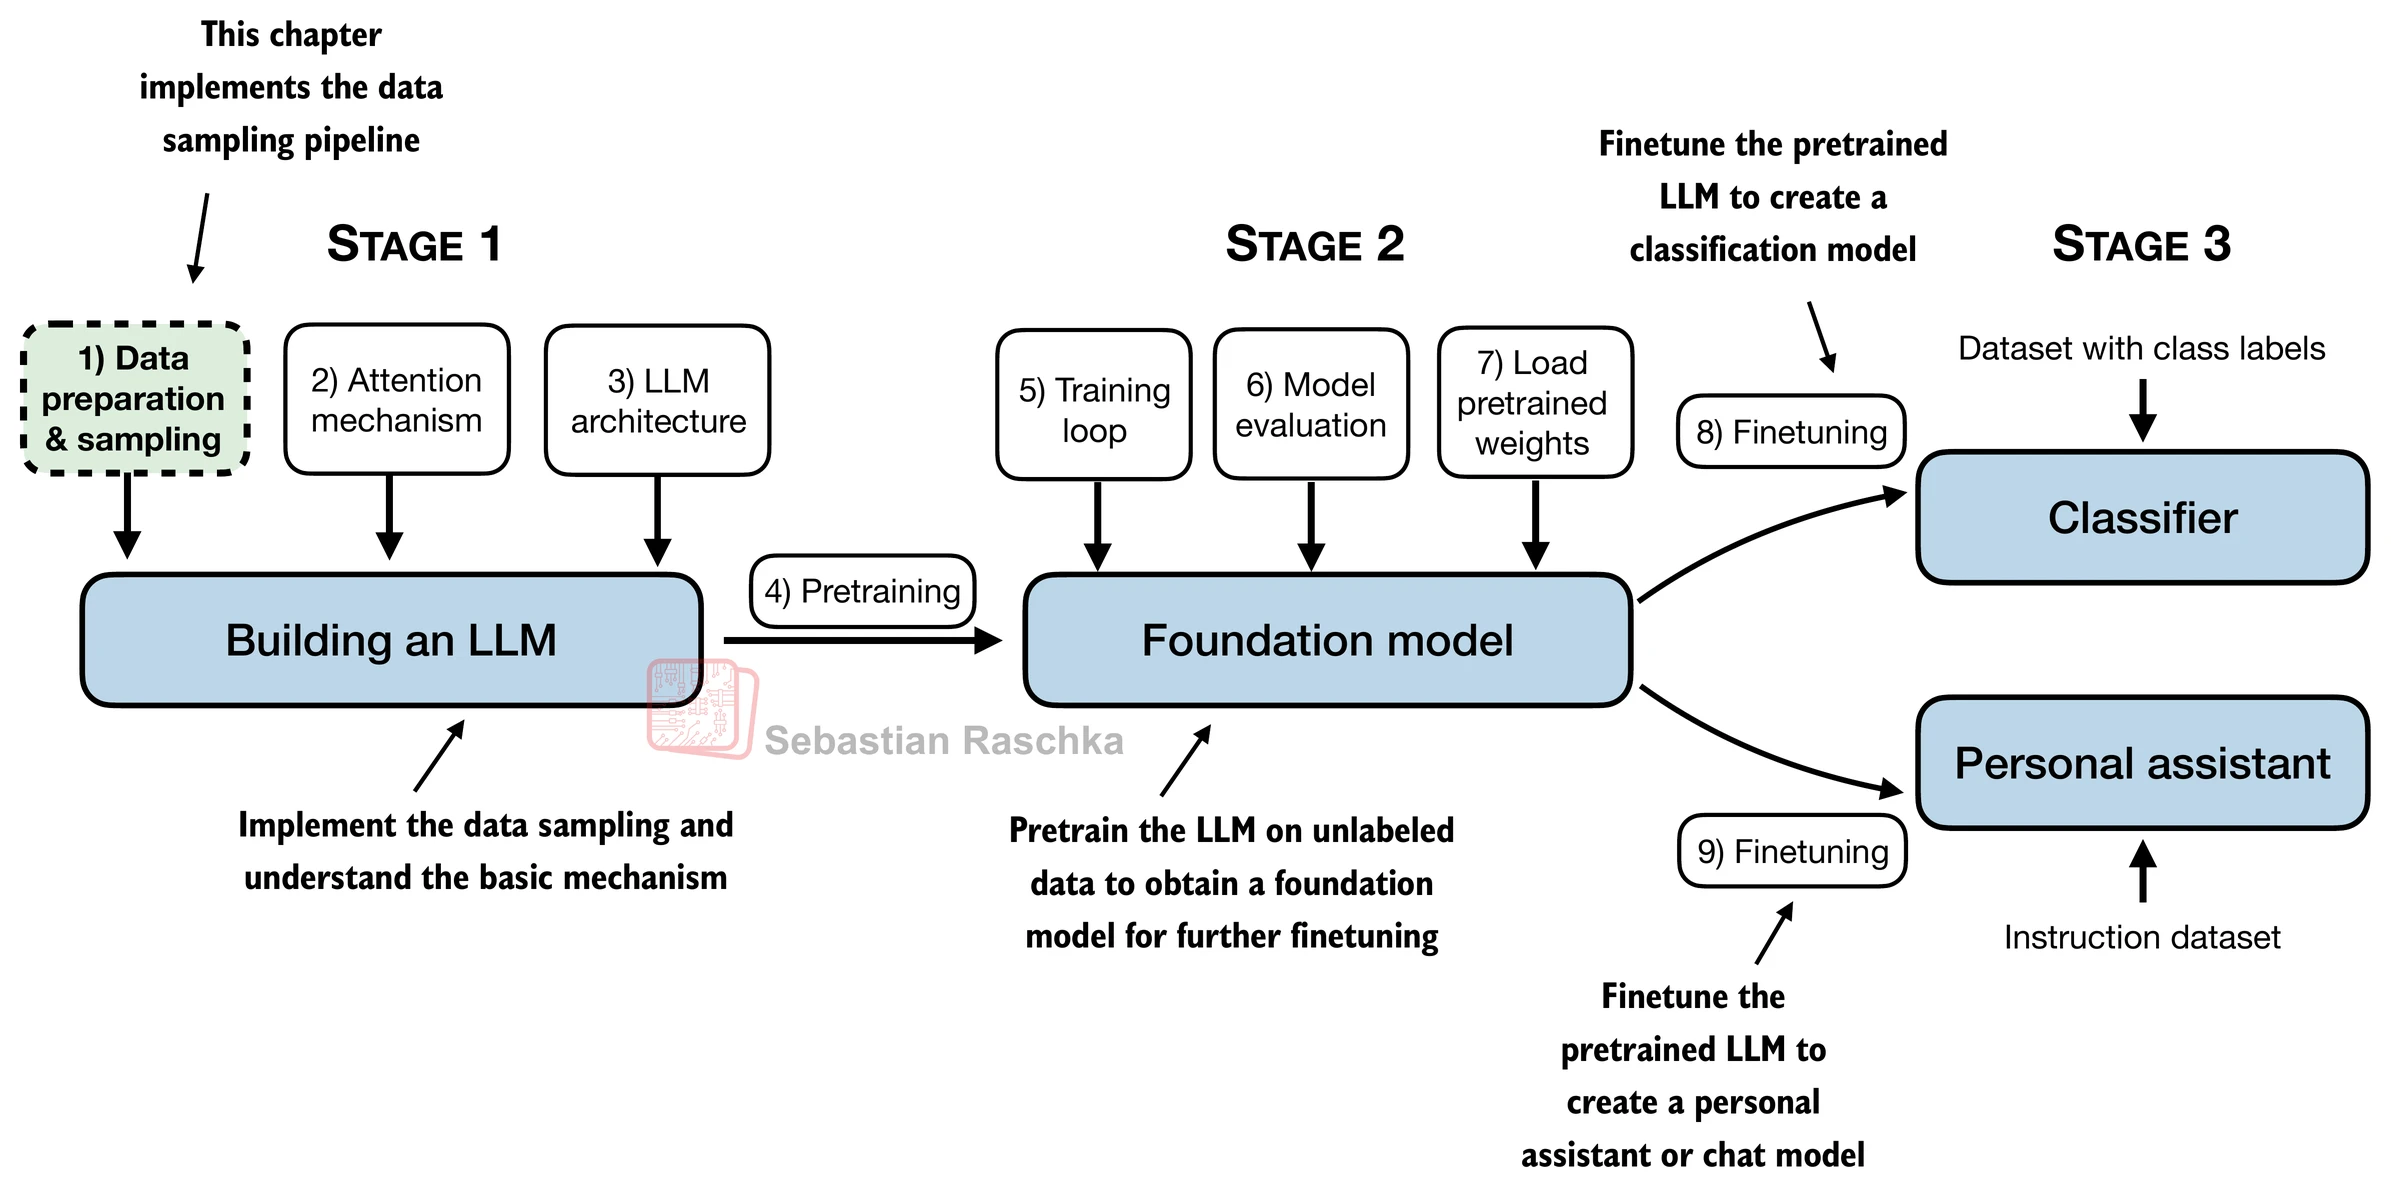

In [5]:
# text data are converted into vectors
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [21]:
# adding the new data
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("total length of the text", len(raw_text))
print(raw_text[:100])

total length of the text 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [7]:
import re

# split the tokens
text = "Hello, this is the test sample"
result = re.split(r"(\s)", text)

print(result)

['Hello,', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [8]:
# split by the space and (,.) chars
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [9]:
# remove the whitespace
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'this', 'is', 'the', 'test', 'sample']


In [11]:
# handle the other types of the punctuation
result = [item for item in result if not item in [",", ".", " "]]
print(result)

['Hello', 'this', 'is', 'the', 'test', 'sample']


In [17]:
# text for the tokenization techniques
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.]|\s|--|\?)', text)
result = [item for item in result if item.strip()]
result = [item for item in result if not item in [",", ".", "?", " "]]
print(result)

['Hello', 'world', 'Is', 'this', '--', 'a', 'test']


In [23]:
# tokenization of the raw text
preprocessed_text = re.split(r'([,.]|\s|--|\?)', raw_text)
preprocessed_text = [item for item in preprocessed_text if item.strip()]
preprocessed_text = [item for item in preprocessed_text if not item in [",", ".", "?", " "]]
print(preprocessed_text)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', 'in', 'the', 'height', 'of', 'his', 'glory', 'he', 'had', 'dropped', 'his', 'painting', 'married', 'a', 'rich', 'widow', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '(Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', ')', '"The', 'height', 'of', 'his', 'glory"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', 'I', 'can', 'hear', 'Mrs', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '"Of', 'course', "it's", 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'way", 'up;', 'but', 'I', "don't", 'think', 'of', 'that', 'Mr', 'Rickham', '--', 'the', 'loss', 'to', 'Arrt', 'is', 'all', 'I', 'think', 'of', '"

## Converting tokens into token IDs